<a href="https://colab.research.google.com/github/then00bprogrammer/Deep-Learning-Projects-and-Experiments/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

#Downloading the zip file of the dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzipping the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-11-07 10:27:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  15.9MB/s    in 8.1s    

2022-11-07 10:27:44 (12.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
#1. Getting the number of sub-directories and files in a directory

import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
#2.

num_steak_images_train=len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [ ]:
#3. Getting the class names

import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")

class_names=np.array(sorted(item.name for item in data_dir.glob('*')))

class_names

array(['pizza', 'steak'], dtype='<U5')

##Viewing an image

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setting up the target directory
  target_folder=target_dir+target_class

  #Get a random image path
  random_image= random.sample(os.listdir(target_folder),1)
  # print(f"Debugging: ${random_image}")

  #Read in the image
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img


Image shape: (512, 512, 3)


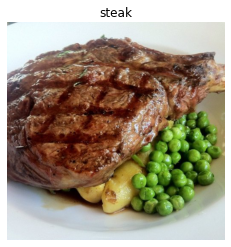

In [ ]:
img=view_random_image(target_dir='pizza_steak/train/',target_class="steak")

Image Shape --> (512,512,3)


-> 512 is width
-> 512 is height
-> 3 is height



In [ ]:
#Normalizing RGB values of the image
img/255

array([[[0.66666667, 0.68235294, 0.62745098],
        [0.61568627, 0.63921569, 0.59215686],
        [0.55294118, 0.58431373, 0.54117647],
        ...,
        [0.88627451, 0.89803922, 0.85490196],
        [0.89803922, 0.90980392, 0.86666667],
        [0.90588235, 0.91764706, 0.8745098 ]],

       [[0.66666667, 0.68235294, 0.62745098],
        [0.63137255, 0.65490196, 0.60784314],
        [0.58431373, 0.61568627, 0.57254902],
        ...,
        [0.88235294, 0.89411765, 0.85098039],
        [0.88235294, 0.89411765, 0.85098039],
        [0.88627451, 0.89803922, 0.85490196]],

       [[0.6745098 , 0.68627451, 0.64313725],
        [0.63921569, 0.6627451 , 0.62352941],
        [0.58823529, 0.61568627, 0.58431373],
        ...,
        [0.8745098 , 0.88627451, 0.84313725],
        [0.87058824, 0.88235294, 0.83921569],
        [0.8627451 , 0.8745098 , 0.83137255]],

       ...,

       [[0.89411765, 0.92156863, 0.95294118],
        [0.89411765, 0.92156863, 0.95294118],
        [0.89019608, 0

##END-TO-END EXAMPLE


*   Load our images
*   Preprocess our images
*   Build a CNN to find pattern in our images
*   Compile our CNN
*   Fit the CNN to our training data







In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory  
# set the seed
tf.random.set_seed(42)
 
# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
#train_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen = ImageDataGenerator(rescale=1./255)
# DEPRECATED!
 
# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'
 
# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
valid_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))
 
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 
# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
 
# Fit the model
history_1 = model_1.fit(train_data_scaled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 104ms/step - loss: 0.6027 - accuracy: 0.6673 - val_loss: 0.4497 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 5s 89ms/step - loss: 0.4462 - accuracy: 0.7900 - val_loss: 0.4292 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 5s 89ms/step - loss: 0.3989 - accuracy: 0.8287 - val_loss: 0.3379 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 4s 87ms/step - loss: 0.3630 - accuracy: 0.8453 - val_loss: 0.3277 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 89ms/step - loss: 0.3196 - accuracy: 0.8640 - val_loss: 0.2982 - val_accuracy: 0.8880


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

#Create a model
model_2=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data_scaled,
                      epochs=5,
                      steps_per_epoch=len(train_data_scaled),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 75ms/step - loss: 1.2379 - accuracy: 0.4887 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 73ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 87ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 73ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#set the seed
tf.random.set_seed(42)

#train the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3=model_3.fit(train_data_scaled,
                      epochs=5,
                      steps_per_epoch=len(train_data_scaled),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 76ms/step - loss: 3.3270 - accuracy: 0.6000 - val_loss: 300.5017 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 4s 75ms/step - loss: 0.8535 - accuracy: 0.7080 - val_loss: 97.9277 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 4s 75ms/step - loss: 0.8069 - accuracy: 0.7307 - val_loss: 96.6066 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 4s 74ms/step - loss: 0.6133 - accuracy: 0.7373 - val_loss: 168.2569 - val_accuracy: 0.6620
Epoch 5/5
47/47 [==============================] - 4s 75ms/step - loss: 0.4797 - accuracy: 0.7893 - val_loss: 71.5731 - val_accuracy: 0.7840


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


##Breaking it Down

###1. Importing and becoming one with data

Image shape: (512, 382, 3)
Image shape: (512, 384, 3)


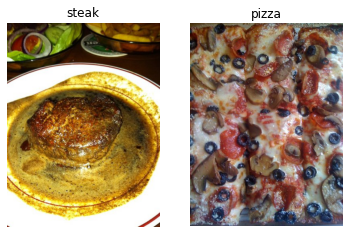

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

###2. Preprocess the Data

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory 
scaling_layer = tf.keras.layers.Rescaling(1./255) 

In [ ]:
# from numpy.core.numeric import binary_repr
#Turn it into batches

train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42,
                                          label_mode='binary')
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
test_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42,
                                         label_mode='binary')
test_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))


Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
len(train_data_scaled)

47

In [ ]:
1500/32

46.875

###3. Create a Model - Baseline
A basic model you start with in the begining of a deep learning project. That's the model you want to keep beating.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
#Create the model
model_4=Sequential([
    Conv2D(filters=10, #number of sliding windows going over an image, higher=more complex
           kernel_size=3,#size of sliding window
           strides=1,#size of the step the sliding windows takes across an input
           padding="valid",#if 'same' output shape is same as input shape, if 'valid',output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
#Compile the Model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4. Fit the model

In [ ]:
#Check the lengths of training and test data generators
len(train_data_scaled),len(test_data_scaled)

(47, 16)

In [ ]:
#Fit the Model
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data_scaled),
                      validation_data=test_data_scaled,
                      validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 6s 102ms/step - loss: 362.3552 - accuracy: 0.6273 - val_loss: 0.6870 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 5s 96ms/step - loss: 6.5774 - accuracy: 0.7980 - val_loss: 0.7118 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 5s 95ms/step - loss: 1.1394 - accuracy: 0.9093 - val_loss: 0.7156 - val_accuracy: 0.4960
Epoch 4/5
47/47 [==============================] - 5s 93ms/step - loss: 0.3015 - accuracy: 0.9673 - val_loss: 0.7817 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 93ms/step - loss: 0.0618 - accuracy: 0.9887 - val_loss: 0.8462 - val_accuracy: 0.5000


###5. Evaluating our Model

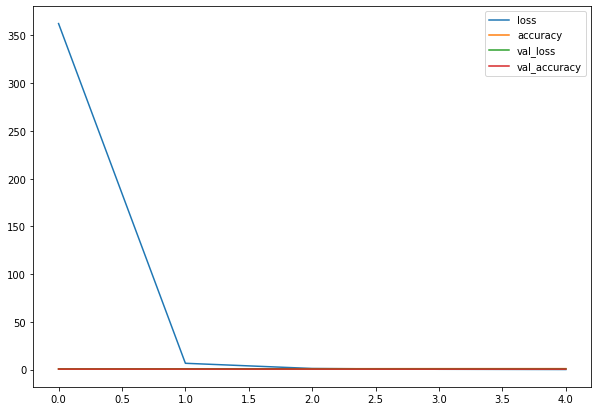

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
#Plot the validation and training curves seprately
def plot_loss_curves(history):
  """
  Return seprate loss curves for training and validation metrics.
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #Plot loss
  plt.figure()
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="Training loss")
  plt.plot(epochs,val_loss,label="Val Loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

    #Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="Training accuracy")
  plt.plot(epochs,val_accuracy,label="Val accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

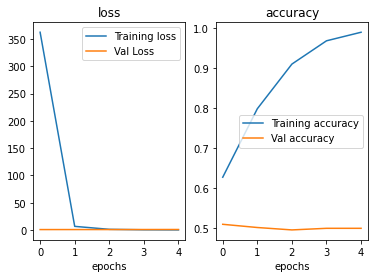

In [ ]:
plot_loss_curves(history_4)

🗝 ***Note***: When a model's validation loss starts to increase, it is very likely that the model is overifitting, i.e. model has learned training data too well and model can't predict decently on unseen data. 

###6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a abseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number pf conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers ( such as MaxPool2D)
* Add more data...

--> Reducing overfitting is also known as Regularization

In [ ]:
#Create the model (this is going to be our new baseline)
model_5 = Sequential([
   Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
   MaxPool2D(pool_size=2) ,
   Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
   MaxPool2D() ,
   Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
   MaxPool2D(pool_size=2) ,
   Flatten(),
   Dense(1,activation="sigmoid")
])

In [ ]:
 #Compile the model

model_5.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
#Fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data_scaled),
                      validation_data=valid_data_scaled,
                      validation_steps=len(valid_data_scaled))

Epoch 1/5
47/47 [==============================] - 5s 86ms/step - loss: 6.9266 - accuracy: 0.5480 - val_loss: 0.6899 - val_accuracy: 0.5880
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.6818 - accuracy: 0.6360 - val_loss: 0.6919 - val_accuracy: 0.5440
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 0.5571 - accuracy: 0.7000 - val_loss: 0.6910 - val_accuracy: 0.5160
Epoch 4/5
47/47 [==============================] - 4s 84ms/step - loss: 0.4742 - accuracy: 0.7640 - val_loss: 0.6894 - val_accuracy: 0.5220
Epoch 5/5
47/47 [==============================] - 4s 83ms/step - loss: 0.4172 - accuracy: 0.8080 - val_loss: 0.6852 - val_accuracy: 0.5640


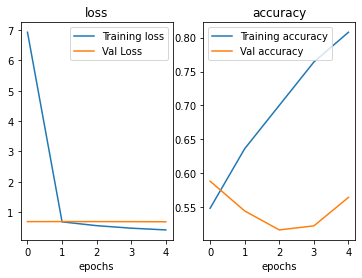

In [ ]:
plot_loss_curves(history_5)

In [ ]:
#Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###Opening our bag of tricks and finding data augmentation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

***What is Data Augmentation?***
Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) patterns. Altering might mean adjusting the rotation of an image, flliping it, cropping it or something similar.

In [ ]:
#Import data and augment it from training directory
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=False #for demonstration purposes only
)

#Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224,224)

#Create non-augmented test data batches
print("Non-augmented test data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary",
                                           shuffle=True)

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


🔑***Note***: Data Augmentation is usually performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they're in the directories but are modified as they're loaded into the model.

In [ ]:
#Get Sample data batches
images,labels=train_data.next()
augmented_images, augmented_labels=train_data_augmented.next() 
#Note: Labels aren't augmented, just the images are


Showing image number: 30


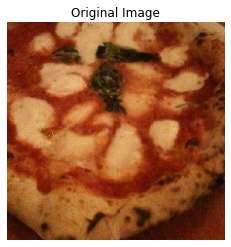

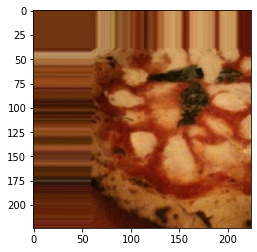

In [ ]:
#Show the original image and augmented image
import random
random_number = random.randint(0,32) #Our Batche Sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])

In [ ]:
#Training our Model on Augmented Data

#Create a model
model_6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_6=model_6.fit(train_data_augmented, #fitting model 6 on augmented data
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 474ms/step - loss: 0.7630 - accuracy: 0.4320 - val_loss: 0.6902 - val_accuracy: 0.5400
Epoch 2/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6928 - accuracy: 0.5100 - val_loss: 0.6777 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6957 - accuracy: 0.5293 - val_loss: 0.6750 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.6903 - accuracy: 0.5413 - val_loss: 0.6522 - val_accuracy: 0.7160
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6716 - accuracy: 0.6367 - val_loss: 0.5709 - val_accuracy: 0.7660


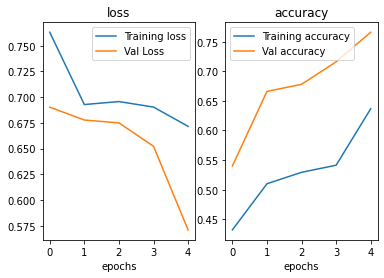

In [ ]:
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model(the same as before) on it and see what happens.

In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                       target_size=(224,224),
                                                                       batch_size=32,
                                                                       class_mode="binary",
                                                                       shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
#Create the model (same as model_5 and model_6)
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#Compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

#Fit the model
history_7=model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6299 - accuracy: 0.6233 - val_loss: 0.4427 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5076 - accuracy: 0.7533 - val_loss: 0.3564 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4970 - accuracy: 0.7673 - val_loss: 0.5036 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 22s 460ms/step - loss: 0.4697 - accuracy: 0.7840 - val_loss: 0.3223 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4775 - accuracy: 0.7787 - val_loss: 0.3767 - val_accuracy: 0.8460


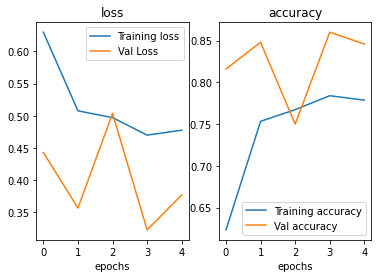

In [ ]:
#Plot loss curves
plot_loss_curves(history_7)

🔑***Note***: When shuffling training data, the model gets exposed to all different kinds of data during training to learn features across a wide array of images (in our case pizza and steak) at the same time instead of going through pizza images first and developing a pattern and adjusting that pattern to fit steak.

###7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D`)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer(more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer Learning** to leverage what another model has learnt and adjust it for our own use case

###Making a prediction with our trained model on our custom data

In [ ]:
#Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-11-07 10:34:22--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg [following]
--2022-11-07 10:34:23--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2022-11-07 10:34:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

(-0.5, 3023.5, 4031.5, -0.5)

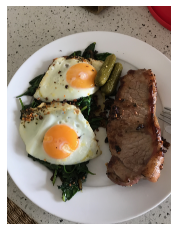

In [ ]:
#View our example image
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
steak=mpimg.imread('/content/03-steak.jpeg?raw=true')
plt.imshow(steak)
plt.axis(False)

In [ ]:
#check the shape of steak
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

🔑***Note***: When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data(or new data) is preprocessed into the same formatas the data your model was trained on.

In [ ]:
#Create a function to import the image and resize it to be able to be used with our CNN model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and
   reshapes it to (img_shape,img_shape,colour_channels).
  """

  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file and turn it into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale the image ( get all the values between 0 and 1 )
  img=img/255.
  return img


In [ ]:
#Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg?raw=true")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 182ms/step


Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualiza the image as well as the model's prediction?

In [ ]:
#Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#We can index the predicted class by rounding prediction probability and indexing it to our class names.
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """

  #Import the target image and preprocess it
  img=load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 15ms/step


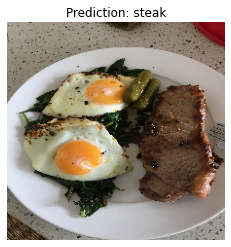

In [ ]:
pred_and_plot(model_7,"03-steak.jpeg?raw=true")

In [ ]:
#Download another custom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-11-07 10:34:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-11-07 10:34:27 (50.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 17ms/step


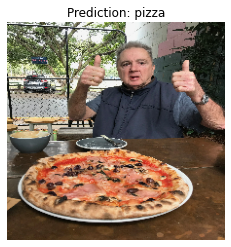

In [ ]:
pred_and_plot(model_7,"/content/03-pizza-dad.jpeg")

##Multi-class Image Classification

--> 10 classes of food classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Become one with the data

In [ ]:
import zipfile

#Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzipping our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-11-07 10:34:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  16.3MB/s    in 33s     

2022-11-07 10:35:01 (15.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

#Walk through 10 classes of food image data
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

There are 2 directories and 0 images in '10_food_classes_all_data' 
There are 10 directories and 0 images in '10_food_classes_all_data/test' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' 
There are 

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Nov  7 10:35 .
drwxr-xr-x  1 root root 4096 Nov  7 10:35 ..
drwxr-xr-x 12 root root 4096 Nov  7 10:35 test
drwxr-xr-x 12 root root 4096 Nov  7 10:35 train


In [ ]:
#Setup the train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
#Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


array([[[168,  55,  73],
        [170,  57,  75],
        [171,  58,  76],
        ...,
        [214, 125, 181],
        [239, 149, 203],
        [232, 142, 196]],

       [[157,  44,  62],
        [157,  44,  62],
        [165,  52,  70],
        ...,
        [191, 104, 159],
        [216, 127, 183],
        [229, 140, 194]],

       [[150,  38,  54],
        [143,  31,  47],
        [145,  32,  50],
        ...,
        [181,  98, 154],
        [179,  96, 152],
        [188, 103, 158]],

       ...,

       [[ 67,  21,  57],
        [ 69,  23,  59],
        [ 64,  20,  56],
        ...,
        [176, 146, 218],
        [174, 142, 215],
        [169, 137, 210]],

       [[ 77,  32,  65],
        [ 74,  28,  64],
        [ 79,  33,  70],
        ...,
        [171, 139, 212],
        [174, 142, 217],
        [177, 145, 220]],

       [[ 89,  44,  77],
        [ 88,  42,  78],
        [102,  56,  93],
        ...,
        [174, 142, 215],
        [178, 146, 221],
        [188, 156, 231]]

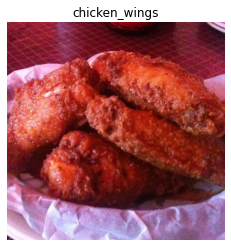

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))
img

###2. Preprocess the data(prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###3. Create a model (start with a baseline)

We've been talking a lot about CNN explainer website...how about we just take their model(also on 10 classes) and use it for our model


In [ ]:
#Importing optimizers,layers and APIs

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create a model
model_8=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")       
])

#Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


###4. Fit the model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 195ms/step - loss: 2.2419 - accuracy: 0.1449 - val_loss: 2.3675 - val_accuracy: 0.1868
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.9412 - accuracy: 0.3293 - val_loss: 1.8918 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.5028 - accuracy: 0.4948 - val_loss: 2.0083 - val_accuracy: 0.3148
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.9194 - accuracy: 0.6956 - val_loss: 2.5584 - val_accuracy: 0.3020
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.3972 - accuracy: 0.8771 - val_loss: 3.9136 - val_accuracy: 0.2768


###5. Evaluate the Model


In [ ]:
#Evaluate on test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 3.9136 - accuracy: 0.2768


[3.9135901927948, 0.2768000066280365]

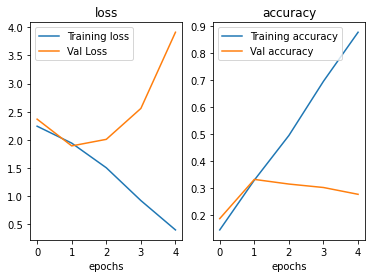

In [ ]:
#Plot loss curves
plot_loss_curves(history_8)

Woaaah, the huge gap between training and validation loss curves tells us that our model is overfitting badly. It is learning the training dataset too well. So it fails to generalize on test data.

###Trying to reduce Overfitting
* ***Get more data*** - give the model more opportunities to learn
* ***Simplify model*** - If the model is overfitting it may mean that model is learning too well, it may be too complicated. So simplify layers by decreasing number of layers.
* ***Use data augmentation*** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* ***Use transfer learning*** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

####1. Simplify the Model

In [ ]:
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 188ms/step - loss: 2.1679 - accuracy: 0.2137 - val_loss: 2.0342 - val_accuracy: 0.2680
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8048 - accuracy: 0.3852 - val_loss: 1.9883 - val_accuracy: 0.3172
Epoch 3/5
235/235 [==============================] - 43s 183ms/step - loss: 1.3371 - accuracy: 0.5655 - val_loss: 2.1316 - val_accuracy: 0.2796
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.7897 - accuracy: 0.7580 - val_loss: 2.5523 - val_accuracy: 0.2808
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.3694 - accuracy: 0.9001 - val_loss: 3.0102 - val_accuracy: 0.2712


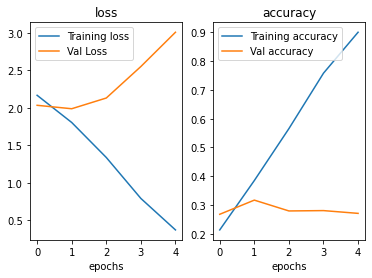

In [ ]:
# Check out the loss curves of model_10
plot_loss_curves(history_9)

####2. Data Augmentation
Since the model is still overfitting, let's try data augmnetation

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_10 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (same setup as used for model_10)
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 456ms/step - loss: 2.3705 - accuracy: 0.1324 - val_loss: 2.2390 - val_accuracy: 0.1644
Epoch 2/5
235/235 [==============================] - 106s 453ms/step - loss: 2.2195 - accuracy: 0.1791 - val_loss: 2.1575 - val_accuracy: 0.2052
Epoch 3/5
235/235 [==============================] - 106s 451ms/step - loss: 2.1799 - accuracy: 0.2116 - val_loss: 2.0604 - val_accuracy: 0.2504
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 2.1174 - accuracy: 0.2412 - val_loss: 1.9942 - val_accuracy: 0.3052
Epoch 5/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0676 - accuracy: 0.2668 - val_loss: 1.9265 - val_accuracy: 0.3032


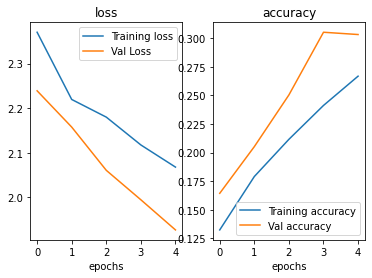

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_10)

###7. Repeat until satisfied
--> Try Transfer learning 
--> Train for longer (more epochs)

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# # Make a prediction using model_10
# pred_and_plot(model=model_10, 
#               filename="03-steak.jpeg", 
#               class_names=class_names)

Hmm... it looks like our model got the prediction wrong, how about we try another?

In [ ]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


TypeError: ignored

And again, it's predicting chicken_curry for some reason.

How about one more?

In [ ]:
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

chicken_curry again? There must be something wrong...

I think it might have to do with our pred_and_plot function.

Let's makes a prediction without using the function and see where it might be going wrong.

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_10.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Much better! There must be something up with our pred_and_plot function.

And I think I know what it is.

The pred_and_plot function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the predict function.

In [ ]:
# Check the output of the predict function
pred = model_10.predict(tf.expand_dims(img, axis=0))
pred

Since our model has a 'softmax' activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using argmax and then use that to index our class_names list to output the predicted class.

In [ ]:
class_names[pred.argmax()]

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_10, "03-steak.jpeg", class_names)

In [ ]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

###Saving and loading our model
Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the save and load_model functions.

In [ ]:
model_10.save("cnn-starter")

In [ ]:
loaded_model_10=tf.keras.models.load_model("cnn-starter")
loaded_model_10.evaluate(test_data)

In [ ]:
# Compare our unsaved model's results (same as above)
model_10.evaluate(test_data)